In [1]:
import pandas as pd

In [29]:
df_p = pd.read_csv('content/Products.csv', delimiter=';')
df_c = pd.read_csv('content/Customers.csv', delimiter=';')
df_o = pd.read_csv('content/Orders.csv', delimiter=';',
                   parse_dates=['OrderDate', 'RequiredDate', 'ShippedDate'],
                   infer_datetime_format=True)
df_od = pd.read_csv('content/Order_details.csv', delimiter=';')
df_e = pd.read_excel('content/Employees.xlsx', sheet_name='Лист1')
df_od['fact_price'] = (df_od.UnitPrice * df_od.Quantity) - (df_od.UnitPrice * (1 - df_od.Discount)) * df_od.Quantity
df_od['Revenue'] = (df_od.UnitPrice * (1 - df_od.Discount)) * df_od.Quantity


In [3]:
df = pd.read_csv('content/orders (1).csv')


2021-03-05    48
2021-03-14    47
2021-03-12    47
2021-03-06    46
2021-03-15    46
2021-03-01    45
2021-03-28    45
2021-03-02    44
2021-03-27    44
2021-03-08    43
2021-03-19    43
2021-03-29    42
2021-03-07    42
2021-03-22    41
2021-03-09    41
2021-03-26    41
2021-03-03    40
2021-03-23    40
2021-03-10    39
2021-03-16    38
2021-03-21    37
2021-03-30    35
2021-03-13    35
2021-03-04    33
2021-03-20    32
2021-03-31    32
2021-03-24    31
2021-03-11    26
2021-03-18    26
2021-03-17    24
2021-03-25    24
Name: date, dtype: int64

In [5]:
df.date.value_counts().max()

48

<AxesSubplot:xlabel='fact_price', ylabel='Revenue'>

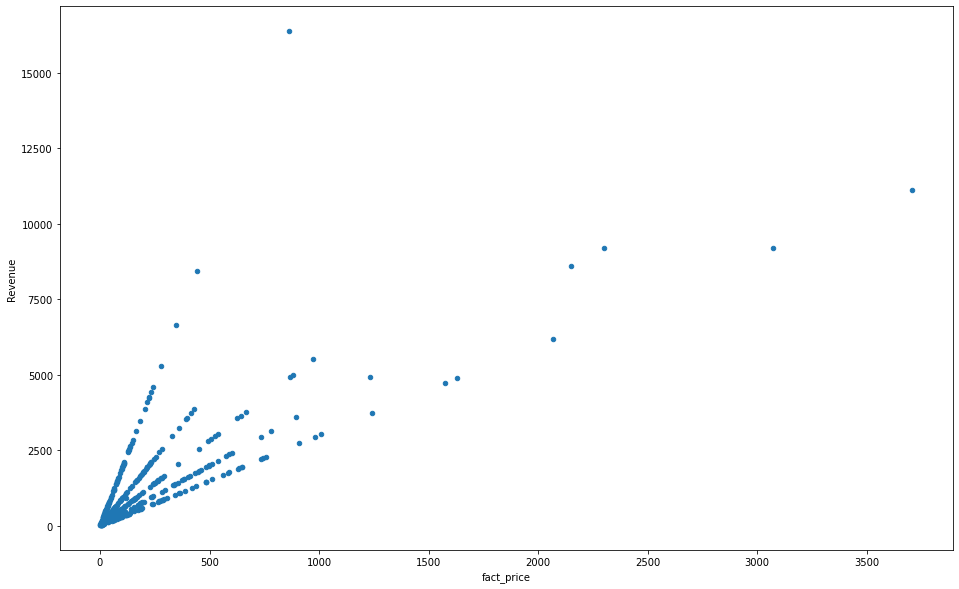

In [38]:
df_od.query('fact_price > 0').groupby('OrderID', as_index=False).agg({'fact_price': 'sum', 'Revenue': 'sum'}).plot(kind='scatter', x = 'fact_price', y='Revenue', figsize=[16,10])

In [11]:
df_o = df_o[['OrderID', 'OrderDate']]
df_o['week'] = df_o.OrderDate.dt.isocalendar().week
df_o['year'] = df_o.OrderDate.dt.year
t = df_o[['OrderID', 'week', 'year']].merge(df_od[['OrderID', 'Revenue']], on='OrderID')
t

,OrderID,week,year,Revenue
0,10248,27,1996,168.000
1,10248,27,1996,98.000
2,10248,27,1996,174.000
3,10249,27,1996,167.400
4,10249,27,1996,1696.000
...,...,...,...,...
2150,11077,19,1998,64.505
2151,11077,19,1998,17.000
2152,11077,19,1998,29.700
2153,11077,19,1998,31.000


In [19]:
t2 = t.query('year in [1997, 1998]').groupby(['week', 'year'], as_index=False).Revenue.sum()
t2

,week,year,Revenue
0,1,1997,24765.4375
1,1,1998,4282.8000
2,2,1997,7135.1800
3,2,1998,29303.6050
4,3,1997,16508.4300
...,...,...,...
66,48,1997,11011.7840
67,49,1997,14516.6000
68,50,1997,10471.8950
69,51,1997,17470.9950


<AxesSubplot:xlabel='week'>

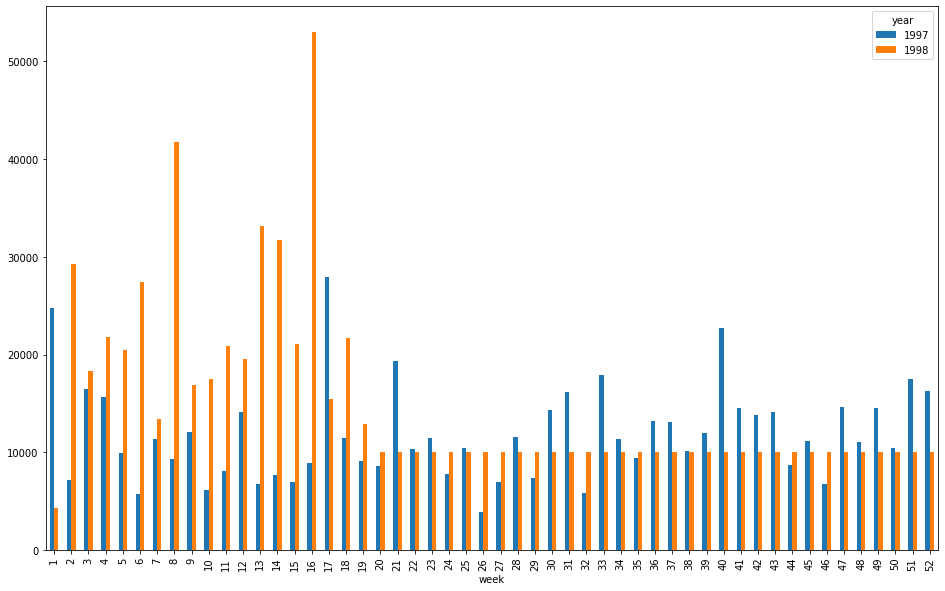

In [24]:
t2.pivot_table(values='Revenue', index='week', columns='year', aggfunc='sum', fill_value=10000).plot(kind='bar',figsize=(16,10))